# STELLAB test notebook

The STELLAB module (which is a contraction for Stellar Abundances) enables to plot observational data for comparison with galactic chemical evolution (GCE) predictions.  The abundance ratios are presented in the following spectroscopic notation :

$$[A/B]=\log(n_A/n_B)-\log(n_A/n_B)_\odot.$$

The following sections describe how to use the code.

In [1]:
# Import the needed packages
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Import the observational data module
import stellab

In [3]:
import sys
# Trigger interactive or non-interactive depending on command line argument
__RUNIPY__ = sys.argv[0]

if __RUNIPY__:
    %matplotlib inline
else:
    %pylab nbagg

## Simple Plot

In order to plot observed stellar abundances, you just need to enter the wanted ratios with the *xaxis* and *yaxis* parameters.  Stellab has been coded in a way that any abundance ratio can be plotted (see Appendix A below), as long as the considered data sets contain the elements.  In this example, we consider the Milky Way.

In [4]:
# Create an instance of Stellab
s = stellab.stellab()

(-1.6, 1.6)

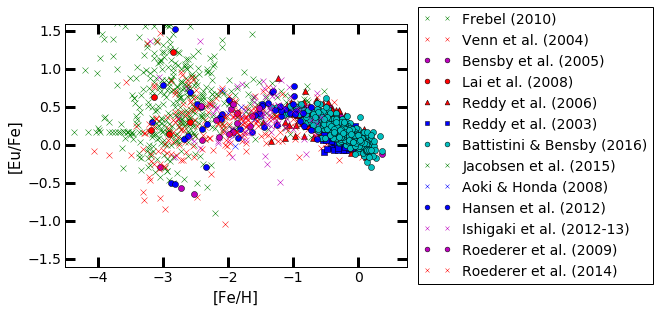

In [5]:
# Plot observational data (you can try all the ratios you want)
s.plot_spectro(xaxis='[Fe/H]', yaxis='[Eu/Fe]')
plt.xlim(-4.5,0.75)
plt.ylim(-1.6,1.6)

## Solar Normalization

By default, the solar normalization $\log(n_A/n_B)_\odot$ is taken from the reference paper that provide the data set.  But every data point can be re-normalized to any other solar values (see Appendix B), using the *norm* parameter.  This is highly recommended, since the original data points may not have the same solar normalization.

In [6]:
# First, you can see the list of the available solar abundances
s.list_solar_norm()

Anders_Grevesse_1989
Grevesse_Noels_1993
Grevesse_Sauval_1998
Asplund_et_al_2009
Asplund_et_al_2005
Lodders_et_al_2009


Here is an example of how the observational data can be re-normalized.

(-1.4, 1.6)

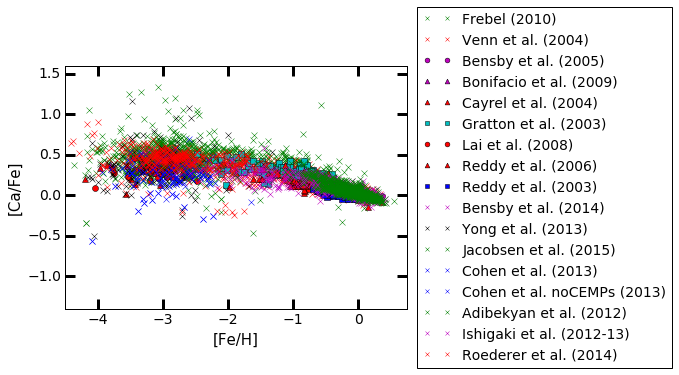

In [7]:
# Plot using the default solar normalization of each data set
s.plot_spectro(xaxis='[Fe/H]', yaxis='[Ca/Fe]')
plt.xlim(-4.5,0.75)
plt.ylim(-1.4,1.6)

Solar value for Fe not found in Venn et al. (2004).  [Fe/H] was not modified.
Solar values for Ca and Fe not found in Venn et al. (2004).  [Ca/Fe] was not modified.
Solar value for Fe not found in Bonifacio et al. (2009).  [Fe/H] was not modified.
Solar values for Ca and Fe not found in Bonifacio et al. (2009).  [Ca/Fe] was not modified.


(-1.4, 1.6)

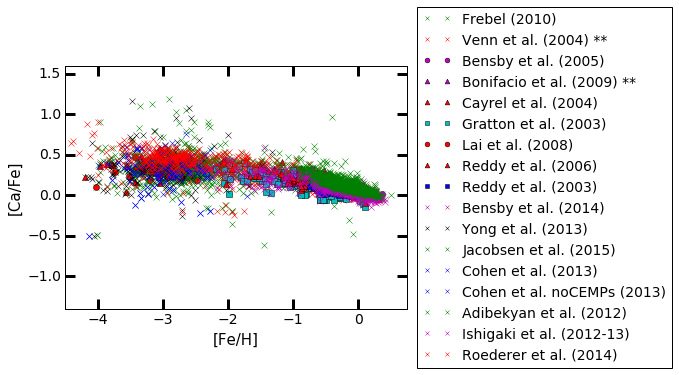

In [8]:
# Plot using the same solar normalization for all data sets
s.plot_spectro(xaxis='[Fe/H]', yaxis='[Ca/Fe]',norm='Asplund_et_al_2009')
plt.xlim(-4.5,0.75)
plt.ylim(-1.4,1.6)

#### Important Note

In some papers, I had a hard time finding the solar normalization used by the authors.  This means I cannot apply the re-normalization for their data set.  When that happens, I print a warning below the plot and add two asterisk after the reference paper in the legend.

## Personal Selection

You can select a subset of the observational data implemented in Stellab.

In [9]:
# First, you can see the list of the available reference papers
s.list_ref_papers()

stellab_data/milky_way_data/Frebel_2010_Milky_Way_stellab
stellab_data/milky_way_data/Venn_et_al_2004_stellab
stellab_data/milky_way_data/Akerman_et_al_2004_stellab
stellab_data/milky_way_data/Andrievsky_et_al_2007_stellab
stellab_data/milky_way_data/Andrievsky_et_al_2008_stellab
stellab_data/milky_way_data/Andrievsky_et_al_2010_stellab
stellab_data/milky_way_data/Bensby_et_al_2005_stellab
stellab_data/milky_way_data/Bihain_et_al_2004_stellab
stellab_data/milky_way_data/Bonifacio_et_al_2009_stellab
stellab_data/milky_way_data/Caffau_et_al_2005_stellab
stellab_data/milky_way_data/Cayrel_et_al_2004_stellab
stellab_data/milky_way_data/Fabbian_et_al_2009_stellab
stellab_data/milky_way_data/Gratton_et_al_2003_stellab
stellab_data/milky_way_data/Israelian_et_al_2004_stellab
stellab_data/milky_way_data/Lai_et_al_2008_stellab
stellab_data/milky_way_data/Nissen_et_al_2007_stellab
stellab_data/milky_way_data/Reddy_et_al_2006_stellab
stellab_data/milky_way_data/Reddy_et_al_2003_stellab
stellab_da

Solar value for Fe not found in Venn et al. (2004).  [Fe/H] was not modified.
Solar values for Ca and Fe not found in Venn et al. (2004).  [Ca/Fe] was not modified.


(-1.4, 1.6)

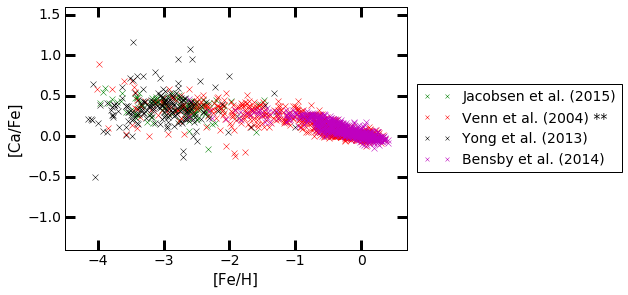

In [10]:
# Create a list of reference papers
obs = ['stellab_data/milky_way_data/Jacobson_et_al_2015_stellab',\
       'stellab_data/milky_way_data/Venn_et_al_2004_stellab',\
       'stellab_data/milky_way_data/Yong_et_al_2013_stellab',\
       'stellab_data/milky_way_data/Bensby_et_al_2014_stellab']

# Plot data using your selection of data points
s.plot_spectro(xaxis='[Fe/H]', yaxis='[Ca/Fe]', norm='Asplund_et_al_2009', obs=obs)

plt.xlim(-4.5,0.7)
plt.ylim(-1.4,1.6)

## Galaxy Selection

The Milky Way (milky_way) is the default galaxy.  But you can select another galaxy among Sculptor, Fornax, and Carina (use lower case letters).

Solar value for Fe not found in Lemasle et al. (2014).  [Fe/H] was not modified.
Solar values for Si and Fe not found in Lemasle et al. (2014).  [Si/Fe] was not modified.


(-1.4, 1.4)

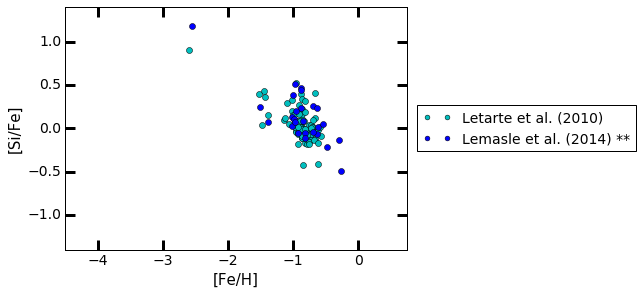

In [11]:
# Plot data using a specific galaxy
s.plot_spectro(xaxis='[Fe/H]', yaxis='[Si/Fe]',norm='Asplund_et_al_2009', galaxy='fornax')
plt.xlim(-4.5,0.75)
plt.ylim(-1.4,1.4)

## Plot Error Bars

It is possible to plot error bars with the **show_err** parameter, and print the mean errors with the **show_mean_err** parameter.

Solar value for Fe not found in Starkenburg et al. (2013).  [Fe/H] was not modified.
Solar values for Ti and Fe not found in Starkenburg et al. (2013).  [Ti/Fe] was not modified.
Mean [Fe/H] error = 0.12614942528735598
Mean [Ti/Fe] error = 0.2171551724137931


(-1.4, 1.4)

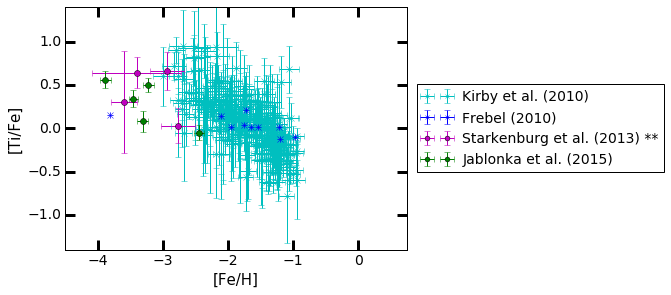

In [12]:
# Plot error bars for a specific galaxy
s.plot_spectro(xaxis='[Fe/H]',yaxis='[Ti/Fe]',\
       norm='Asplund_et_al_2009', galaxy='sculptor', show_err=True, show_mean_err=True)
plt.xlim(-4.5,0.75)
plt.ylim(-1.4,1.4)

# Appendix A - Abundance Ratios

Let's consider that a data set provides stellar abundances in the form of [X/Y], where Y is the reference element (often H or Fe) and X represents any element.  It is possible to change the reference element by using simple substractions and additions.

### Substraction

Let's say we want [Ca/Mg] from [Ca/Fe] and [Mg/Fe].

$$[\mathrm{Ca}/\mathrm{Mg}]=\log(n_\mathrm{Ca}/n_\mathrm{Mg})-\log(n_\mathrm{Ca}/n_\mathrm{Mg})_\odot$$

$$=\log\left(\frac{n_\mathrm{Ca}/n_\mathrm{Fe}}{n_\mathrm{Mg}/n_\mathrm{Fe}}\right)-\log\left(\frac{n_\mathrm{Ca}/n_\mathrm{Fe}}{n_\mathrm{Mg}/n_\mathrm{Fe}}\right)_\odot$$

$$=\log(n_\mathrm{Ca}/n_\mathrm{Fe})-\log(n_\mathrm{Mg}/n_\mathrm{Fe})-\log(n_\mathrm{Ca}/n_\mathrm{Fe})_\odot+\log(n_\mathrm{Mg}/n_\mathrm{Fe})_\odot$$

$$=[\mathrm{Ca}/\mathrm{Fe}]-[\mathrm{Mg}/\mathrm{Fe}]$$

### Addition

Let's say we want [Mg/H] from [Fe/H] and [Mg/Fe].

$$[\mathrm{Mg}/\mathrm{H}]=\log(n_\mathrm{Mg}/n_\mathrm{H})-\log(n_\mathrm{Mg}/n_\mathrm{H})_\odot$$

$$=\log\left(\frac{n_\mathrm{Mg}/n_\mathrm{Fe}}{n_\mathrm{H}/n_\mathrm{Fe}}\right)-\log\left(\frac{n_\mathrm{Mg}/n_\mathrm{Fe}}{n_\mathrm{H}/n_\mathrm{Fe}}\right)_\odot$$

$$=\log(n_\mathrm{Mg}/n_\mathrm{Fe})-\log(n_\mathrm{H}/n_\mathrm{Fe})-\log(n_\mathrm{Mg}/n_\mathrm{Fe})_\odot+\log(n_\mathrm{H}/n_\mathrm{Fe})_\odot$$

$$=\log(n_\mathrm{Mg}/n_\mathrm{Fe})+\log(n_\mathrm{Fe}/n_\mathrm{H})-\log(n_\mathrm{Mg}/n_\mathrm{Fe})_\odot-\log(n_\mathrm{Fe}/n_\mathrm{H})_\odot$$

$$=[\mathrm{Mg}/\mathrm{Fe}]+[\mathrm{Fe}/\mathrm{H}]$$

### Test

(-1, 1)

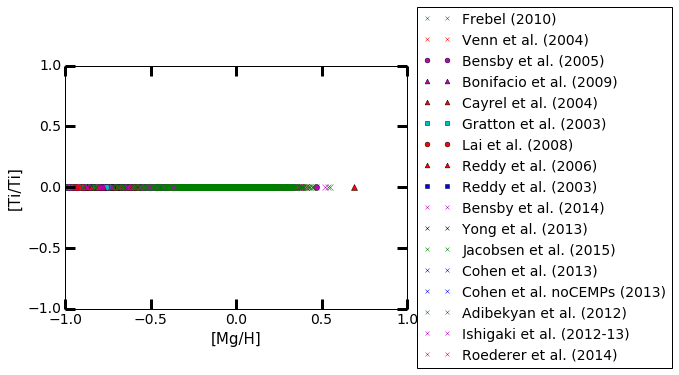

In [13]:
# Everything should be on a horizontal line
s.plot_spectro(xaxis='[Mg/H]', yaxis='[Ti/Ti]')
plt.xlim(-1,1)
plt.ylim(-1,1)

(-1, 1)

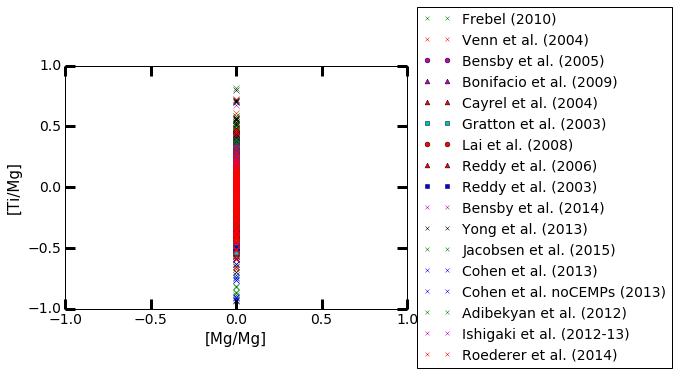

In [14]:
# Everything should be on a vertical line
s.plot_spectro(xaxis='[Mg/Mg]', yaxis='[Ti/Mg]')
plt.xlim(-1,1)
plt.ylim(-1,1)

(-1, 1)

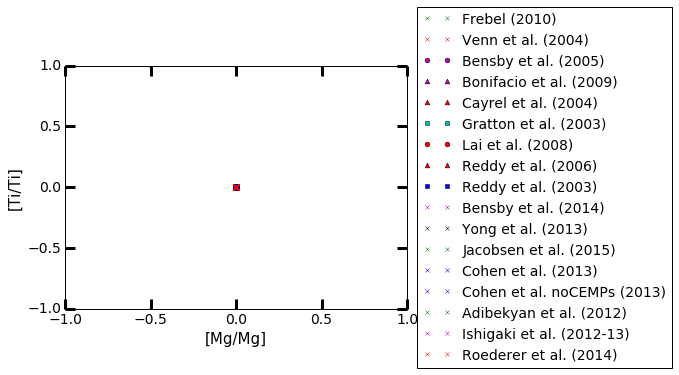

In [15]:
# Everything should be at zero
s.plot_spectro(xaxis='[Mg/Mg]', yaxis='[Ti/Ti]')
plt.xlim(-1,1)
plt.ylim(-1,1)

# Appendix B - Solar Re-Normalization

Changing the solar normalization is a very straightforward operation.

$$[\mathrm{Mg}/\mathrm{H}]=\log(n_\mathrm{Mg}/n_\mathrm{H})-\log(n_\mathrm{Mg}/n_\mathrm{H})^{\mathrm{paper}}_\odot+\log(n_\mathrm{Mg}/n_\mathrm{H})^{\mathrm{paper}}_\odot-\log(n_\mathrm{Mg}/n_\mathrm{H})^{\mathrm{re-norm}}_\odot$$

$$=[\mathrm{Mg}/\mathrm{H}]_\mathrm{paper}+\log(n_\mathrm{Mg}/n_\mathrm{H})^{\mathrm{paper}}_\odot-\log(n_\mathrm{Mg}/n_\mathrm{H})^{\mathrm{re-norm}}_\odot$$

In these two last equations, *paper* refers to the reference paper that provides the data set, and *re-norm* refers to the new solar abundances you want for your re-normalization.